# Flamant Method implement

In [1]:
import os, os.path
import time

import cv2
import numpy as np
import pandas as pd
np.set_printoptions(threshold=np.inf)

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

import seaborn as sns
from astropy import units as u

from scipy.integrate import quadrature as gq
import scipy.linalg as linalg
import pickle 

In [2]:
with open("export_uz.pkl", "rb") as f: # "wb" because we want to write in binary mode
    uz_import = pickle.load(f)

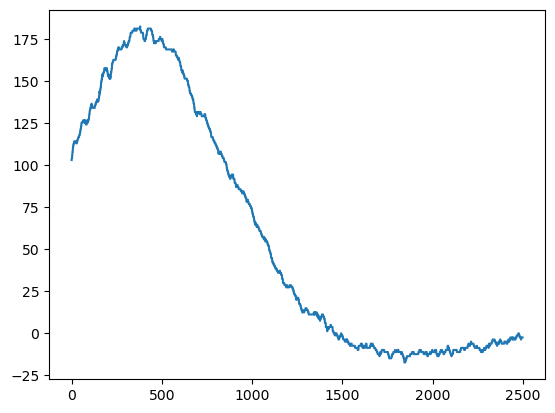

In [3]:
''' Change time point variable (tp) and run all cells to see other results '''

tp = 3
uz = np.array(uz_import[tp])
plt.plot(uz)

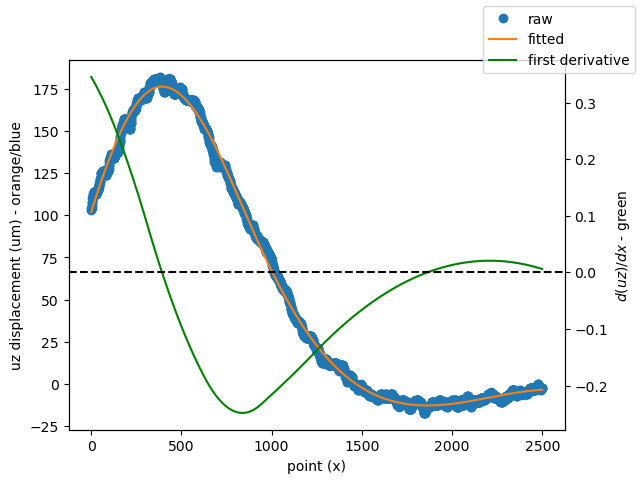

In [4]:
# Smoothen the curve and calculate first derivative

from scipy.signal import savgol_filter
from scipy.interpolate import splev, splrep

m = len(uz)

a = np.arange(0,m,1)
y = uz

yhat = savgol_filter(y, m, 8)

spl = splrep(np.arange(0,len(uz),1), yhat, s=m)

yhatspl = splev(a, spl, der=0)
yhatprime = splev(a, spl, der=1)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(y, 'o', label = 'raw')
ax1.plot(a, yhatspl,label = 'fitted')
ax2.plot(a, yhatprime, 'g', label='first derivative')
ax2.axhline(y=0, ls='--', c='k')

ax1.set_ylabel('uz displacement (um) - orange/blue')
ax2.set_ylabel(r'$d(uz)/dx$ - green')
ax1.set_xlabel('point (x)')
fig.legend()

In [5]:
m = len(uz) 
a = np.arange(0,m,1) # iterator

s = np.linspace(0,1,m+1)
s = np.delete(s, 0) # removing 0 from the list p(0) = 0 --> assumption

ds = s[1] - s[0]

In [6]:
x = np.arange(ds/2,1,ds)
# print('x: ',x)
dx = x[1] - x[0]
print('dx: ',dx)

dx:  0.0004000000000000001


In [7]:
num = np.arange(0,m,1)

A = np.zeros([len(num),len(num)])

In [8]:
# Flamant solution matrix - simplified

for i in num:
    for j in num:
        value = -1/(2*m) * 1/(x[i] - s[j])
        A[i,j] = value

In [9]:
# Flamant Solution - linalg solve

s = np.matrix(s)
sT = s.T
sT

yhatspl_mat = np.matrix(yhatspl)
uzT = yhatspl_mat.T
uzT

b = np.matrix(yhatprime)
bT = b.T

solve = np.linalg.solve(A, bT)

# check = A * solve

In [10]:
# Multiply by the constant 

E = 0.125 #Modulus - u.MPa #MPa
v = 0.49 #Poisson Ratio - u.dimensionless_unscaled
width = 3.1 #Width of sample - u.mm

c = 2*(1-v**2)/(np.pi*E)
solve_new = c * solve

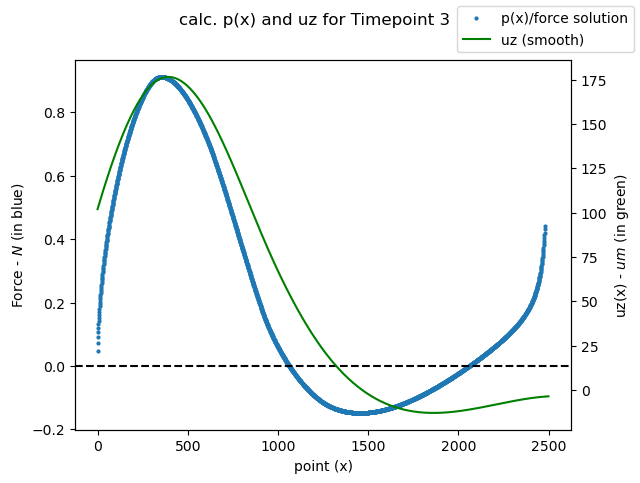

In [11]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# ax1.plot(np.array(solve_new), 'o', markersize=2, label = 'p(x)/force solution')
ax1.plot(np.array(solve_new[:-20]), 'o', markersize=2, label = 'p(x)/force solution')
ax1.axhline(y=0, ls='--', c='k')
ax1.set_ylabel(r'Force - $N$ (in blue)')
ax1.set_xlabel('point (x)')

ax2.plot(np.array(yhatspl), 'g', label='uz (smooth)')
ax2.set_ylabel(r'uz(x) - $um$ (in green)')

fig.suptitle(f'calc. p(x) and uz for Timepoint {tp}')
fig.legend()

Unstable behavior noticed at the right boundary condition
- Could be due to the fitting function: savgol_filter
- Try implementing prony series to see if we can get better fitting

I did not have time to implement these ideas for this project but I am actively working on them